# Logging System
- A logging system is designed to efficiently capture, filter, and output application events with varying levels of severity. The system needs to support multiple log levels, formatting options, destinations, and filtering capabilities while maintaining a clean separation of concerns. The system should be extensible, allowing for new log handlers, formatters, and destinations to be easily integrated.

## Rules of the system
- Setup:
    - The system supports multiple log levels (DEBUG, INFO, WARNING, ERROR, FATAL)
    - Logs have attributes like timestamp, level, message, and context data.
    - The system can route logs to different destinations based on level and content.
- Operation
    - Applications create log messages with a specific severity level
    - Each log passes through a chain of handlers that decide whether to process it.
    - Handlers can filter, format, and dispatch logs to various destinations.
    - The system can be configured to customize logging behavior at runtime.
- Features:
    - Level-based filtering to control which logs are processed.
    - Formating options for different output destinations.
    - Support for multiple output destinations (console, file, network, etc)
    - Context enrichment to add additional information to log entries.

## Interview Setting
### Point 1: Intro and Vague Problem Statement
- Interviewer: Let's start with a basic problem statement. Design a Loggin System
- Candidate: Here's my understanding of the Logging System requirements:
    - The system will process log messages with different severity levels
    - Logs should be filtering based on configuration settings
    - The system shoudl support various output destinations
- Interviewer: We are on the right track..
- Candidate: Before diving into the design. I'd like to clarify a few requirements.
    - What log levels should the system support?
    - What types of destinations should we consider?
    - Are there any specific filtering or formatting requirements?
### Point 2: Clarifying Requrirements
- Interviewer: We want a system that:
    - Supports the standard log levels (DEBUG, INFO, WARNING, ERROR, FATAL)
    - Log messages with timestamp, level, and content
    - Multiple output destinations (console, file, database)
    - Configuration mechanism for log level and output destination.
    - Extensibility for new log levels and output destinations.
- Candidate: To summarize, the key requirements are:
    - A flexible logging system with standard severity levels
    - Support for multiple output destinations
    - Configuration filering capabilities
- Intervieewe: Perfect
### Point 3: Identifying key components
- Candidate: Let's identify the key components of our logging system:
    - Log level: Enum representing different severity levels
    - Log Messages: Class which contains log messaege with all its attributes
    - Log Config: This class holds the configuration settings for the logger
    - Log Appender: Interface responsible for writing logs to destinations
    - Logger: Singleton class that provided the main logging functionality
- Interviewer: Let's proceed
### Point 4: Design Challenges:
- Interviewer: What design challanges do we anticipate?
- Candidate: The key challenges for the logging system include:
    - Chain construction: Building a flexible chain of handlers that can be modified at runtime.
    - Performance considerations: Ensure efficient log processing, especially for high-volumne applications
    - Configuration management: Providing an easy way to configure the system.
### Point 5: Approach:
- Interviewer: How would we approach these challenges
- Candidate: I propose using several design patterns effectively. Here are my strategies:
    - Chain of responsibility pattern for log processing
        - Create a chain of log handlers
        - Each handler decides whether to process the log or pass it along
        - Enables separation of concerns for filtering =, formatting, and output.
    - Strategy Pattern for log Appenders
        - Encapsulates different log appending strategies
        - Allows runtime selection of log appenders (console, file, etc)
        - Makes it easy to add new appender options
    - Singeleton pattern for logger instance:
        - Provides a global access point to the logging system
        - Ensures consistent configuration across the application
- Interviewer: Let's dive into the implementation details.
### Point 6: Implementation
- Interviewer: Ready to discuss implementation?
- Candidate: I'll focus on implementing the design patterns and show how they work together in the logging system
- 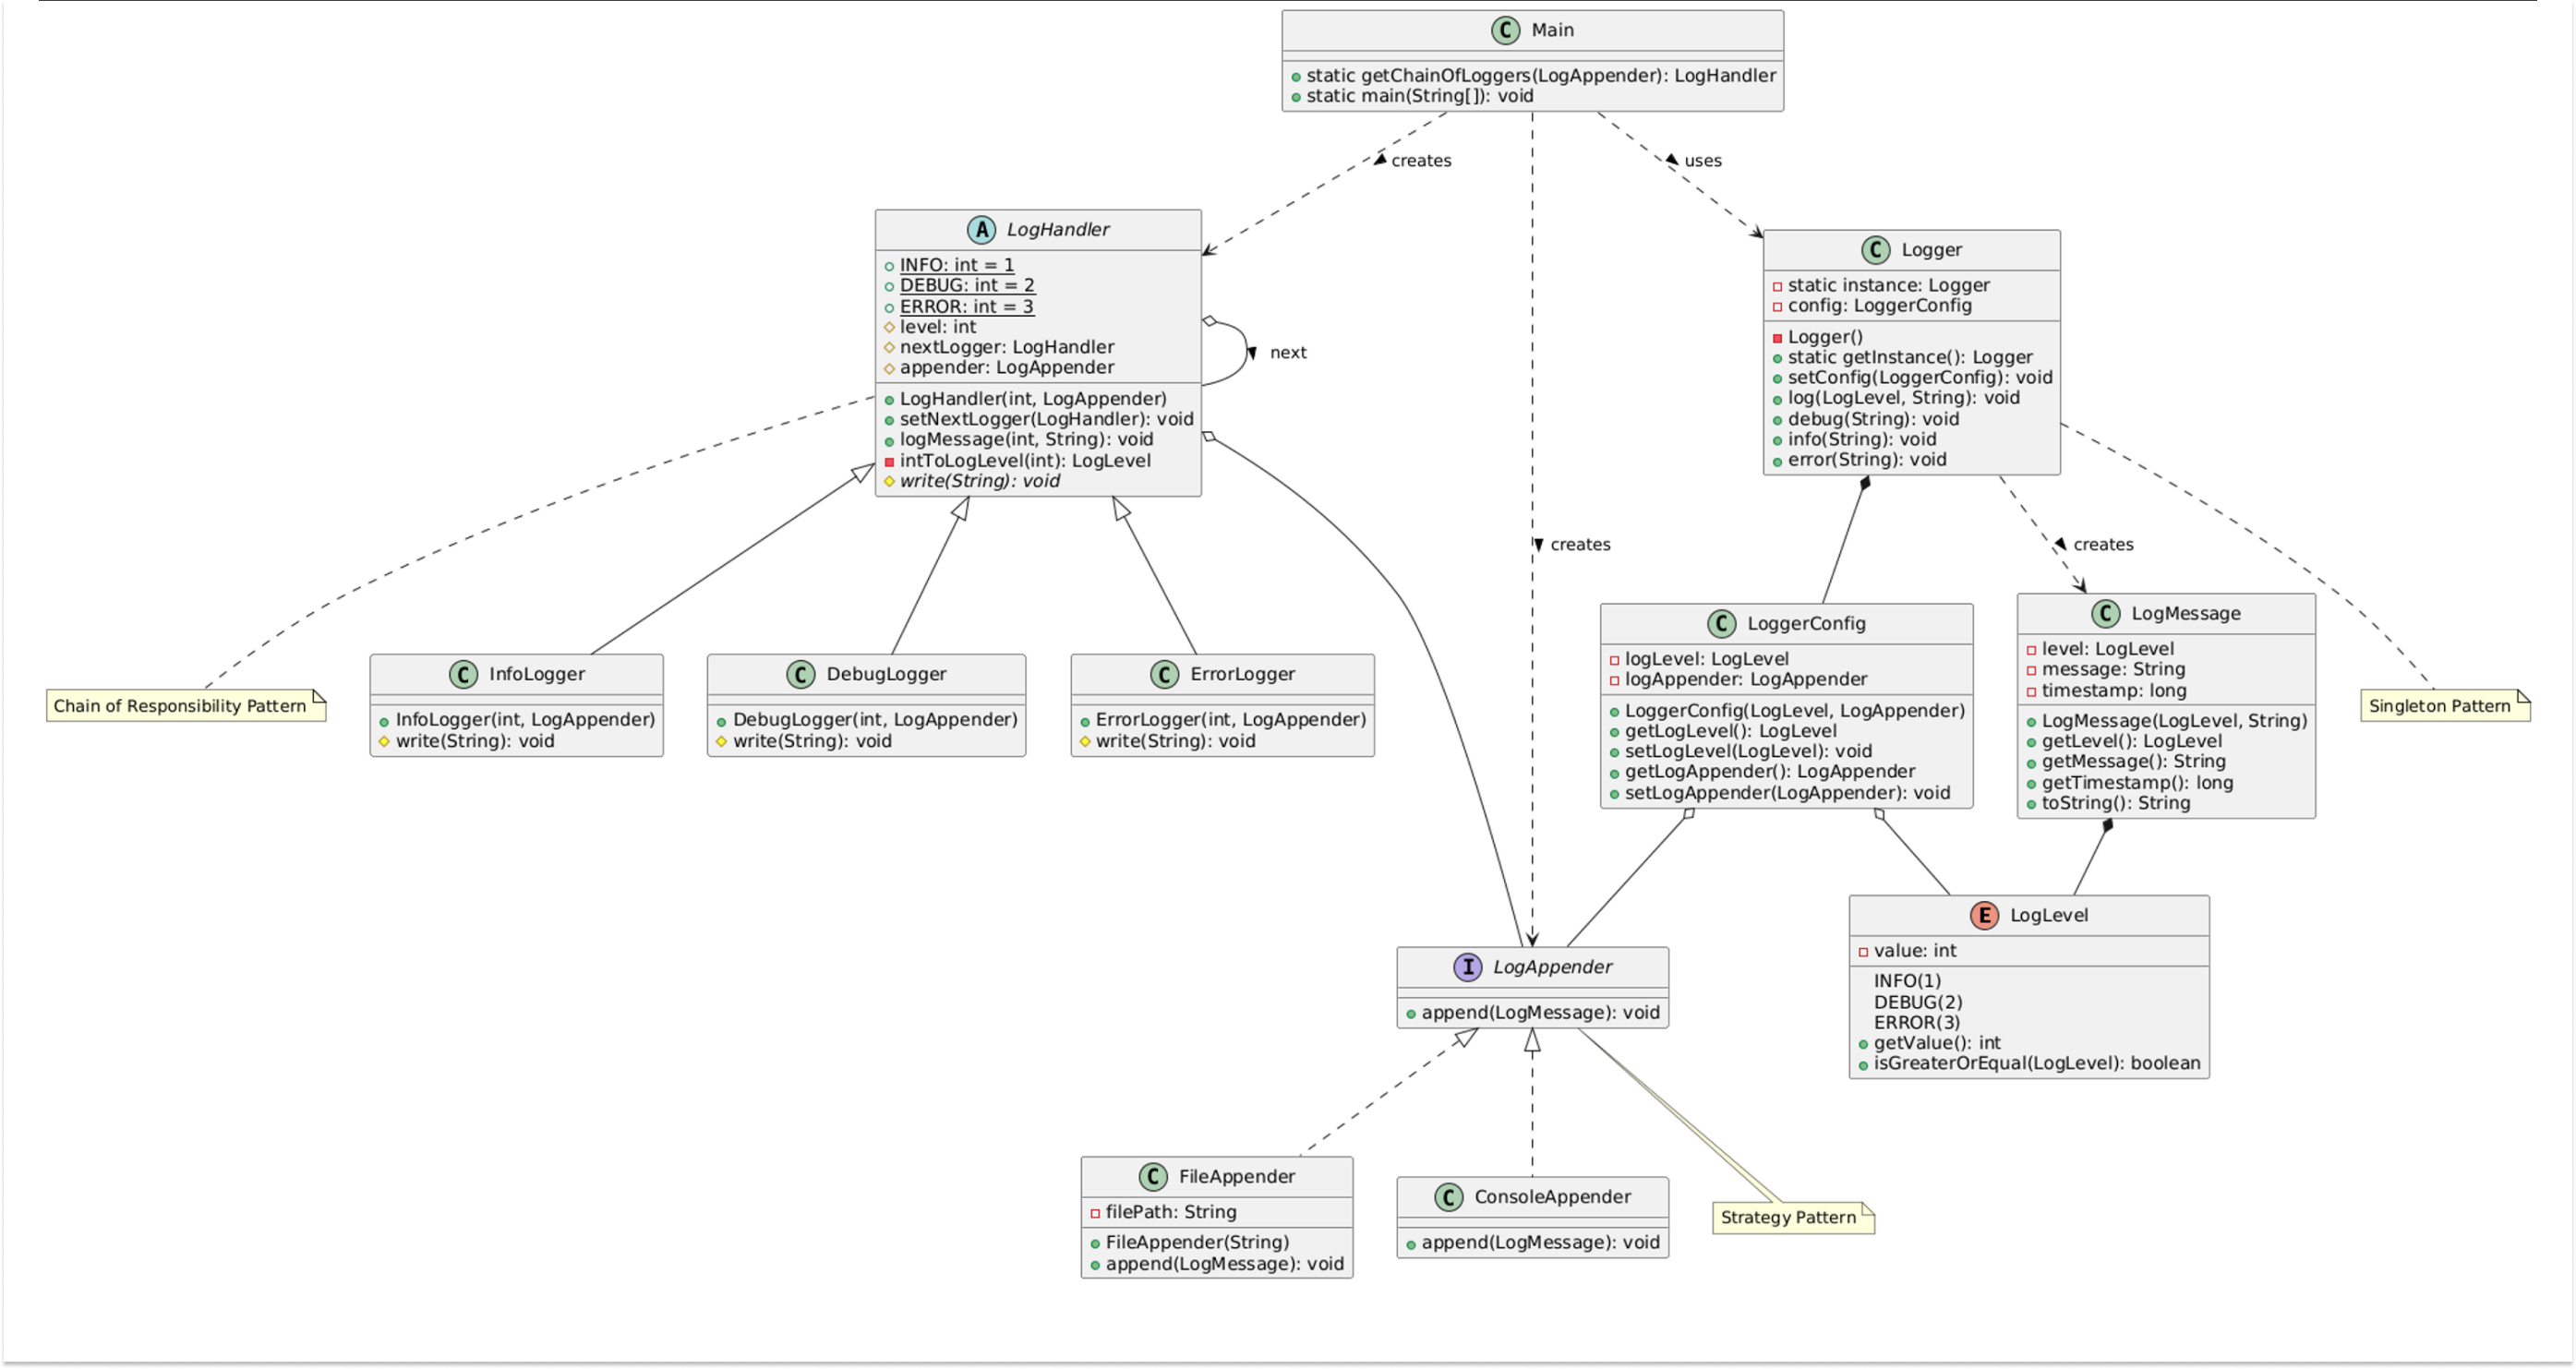

#### Implementing Cor Classes:
1. Log Level Enum
2. Log Message

In [1]:
from enum import Enum

# (DEBUG, INFO, WARNING, ERROR, FATAL)

class LogLevel(Enum):
    DEBUG = 1
    INFO = 2
    ERROR = 3
    WARNING = 4
    FATAL = 5

    # @property
    # def value(self):
    #     return self._value_

    def isGreaterOrEqual(self, other):
        return self.value >= other.value

In [2]:
import time

class LogMessage:
    def __init__(self, level: LogLevel, message: str):
        self.level = level
        self.message = message
        self.timestamp = int(time.time())

    def getLevel(self):
        return self.level

    def getMessage(self):
        return self.message

    def getTimestamp(self):
        return self.message

        
    def __str__(self):
        return f"[{self.level}] {self.timestamp} - {self.message}"

#### Strategy Pattern for Log Appenders

In [3]:
from abc import ABC, abstractmethod

class LogAppender(ABC):
    @abstractmethod
    def append(self, logMessage: LogMessage):
        pass

# appends log messages to a file
class FileAppender(LogAppender):
    def __init__(self, filepath: str):
        self.filepath = filepath

    def append(self, logMessage: LogMessage):
        try:
            # Writing log to a file
            # writer = FileWriter(self.filepath, True)
            print(f"Writing log to {self.filepath} file.")
            print(logMessage)
        except:
            print("File not found")
            
# appends log messages to a console
class ConsoleAppender(LogAppender):
    def append(self, logMessage: LogMessage):
        print(logMessage)
        
# appends log messages to a database
class databaseAppender(LogAppender):

    def __init__(self, databaseName: str):
        self.databaseName = databaseName
    
    def append(self, logMessage):
        print(f"Inserting the log to the {self.databaseName} database.")
        print(logMessage)

class LoggerConfig:
    def __init__(self, logLevel: LogLevel, logAppender: LogAppender):
        self.logLevel = logLevel
        self.logAppender = logAppender

    def getLogLevel(self):
        return self.logLevel

    def setLogLevel(self, logLevel: LogLevel):
        self.logLevel = logLevel

    def getLogAppender(self):
        return self.logAppender

    def setLogAppender(self, logAppender: LogAppender):
        self.logAppender = logAppender

#### Chain of Responsibility pattern for Log Handlers

In [11]:
class LogHandler(ABC):
    INFO = 1
    DEBUG = 2
    ERROR = 3
    def __init__(self, level: int, appender: LogAppender):
        self.level = level
        self.appender = appender
        self.nextLogger = None

    def setNextLogger(self, nextLogger):
        self.nextLogger = nextLogger

    def intToLogLevel(self, level: int):
        if level == self.INFO:
            return LogLevel.INFO
        elif level == self.DEBUG:
            return LogLevel.DEBUG
        elif level == self.ERROR:
            return LogLevel.ERROR
        else:
            return LogLevel.INFO
    
    
    def logMessage(self, level: int, message: str):
        if self.level > level:
            logLevel = self.intToLogLevel(level)
            logMsg = LogMessage(logLevel, message)
            
            if self.appender != None:
                self.appender.append(message)
            self.write(message)
        elif self.nextLogger != None:
            self.nextLogger.logMessage(level, message)

    @abstractmethod
    def write(self, message: str):
        pass

class InfoLogger(LogHandler):
    def __init__(self, level, appender):
        super().__init__(level, appender)

    def write(self, message: str):
        print(f"INFO: {message}")

class DebugLogger(LogHandler):
    def __init__(self, level, appender):
        super().__init__(level, appender)

    def write(self, message: str):
        print(f"DEBUG: {message}")

class ErrorLogger(LogHandler):
    def __init__(self, level, appender):
        super().__init__(level, appender)

    def write(self, message: str):
        print(f"ERROR: {message}")

#### singleton pattern for Main class Logger

In [12]:
import threading

class Logger:
    instances = {}
    instanceLock = threading.Lock() # For thread-safe instance creation
    
    def __init__(self, logLevel: LogLevel, logAppender: LogAppender):
        self.config = LoggerConfig(logLevel, logAppender)
        self.configLock = threading.Lock()

    @classmethod
    def getInstance(cls, logLevel, logAppender):
        key = f"{logLevel.name}_{logAppender.__class__.__name__}"

        # Thread safe creation, same as concurrentHasMap.computeIfAbsent
        with cls.instanceLock:
            if key not in cls.instances:
                cls.instances[key] = cls(logLevel, logAppender)
            return cls.instances[key]


    def setConfig(self, config):
        with self.configLock:
            self.config = config

    def log(self, level: LogLevel, message: str):
        if level.value >= self.config.getLogLevel().value:
            logMsg = LogMessage(level, message)
            self.config.getLogAppender().append(logMsg)

    def debug(self, message):
        self.log(LogLevel.DEBUG, message)

    def info(self, message):
        self.log(LogLevel.INFO, message)

    def error(self, message):
        self.log(LogLevel.ERROR, message)

In [15]:
class Main:
    def getChainOfLoggers(self, appender: LogAppender):
        errorLogger = ErrorLogger(LogHandler.ERROR, appender)
        debugLogger = DebugLogger(LogHandler.DEBUG, appender)
        infoLogger = InfoLogger(LogHandler.INFO, appender)
        infoLogger.setNextLogger(debugLogger)
        debugLogger.setNextLogger(errorLogger)
        return infoLogger

    def main(self):
        consoleAppender = ConsoleAppender()
        fileAppender = FileAppender("c:/filepath")

        loggerChain = self.getChainOfLoggers(consoleAppender)

        # Use a single logging approach to avoid duplication
        print("Logging INFO level message:")
        loggerChain.logMessage(LogHandler.INFO, "This is an information.")
        print("Logging DEBUG level message:")
        loggerChain.logMessage(LogHandler.DEBUG, "This is a debug level information.")
        print("Logging ERROR level message:")
        loggerChain.logMessage(LogHandler.ERROR, "This is an error information.")

        print("Using singleton logger")
        logger = Logger.getInstance(LogLevel.INFO, consoleAppender)
        logger.setConfig(LoggerConfig(LogLevel.INFO, fileAppender))
        logger.error("Using Singleton Logger - Error message")

Main().main()

Logging INFO level message:
This is an information.
DEBUG: This is an information.
Logging DEBUG level message:
This is a debug level information.
ERROR: This is a debug level information.
Logging ERROR level message:
Using singleton logger
Writing log to c:/filepath file.
[LogLevel.ERROR] 1764352993 - Using Singleton Logger - Error message


- Interviewer: What makes your approach effective?
- Candidate The key strenghts of my approach for the logging system:
    1. Flexibility chain of responsibility
        - The design implements the chain of responsibility pattern to create a flexible pipeline of log handlers. Each handler has a specific purpose (filtering, formatting, output), and they can be composed in any order.
    2. Single Responsibility principle
        - Each class has a clear focused responsibiliity. Formatters handle formatting, filters handle filtering and appenders handle output destinations. This makes the code easier to understand and maintain.
    3. Open/Closed Principle
        - The system is open for extension but closed for modification. New handlers, formtters, or appenders can be added without changing existing code.
    4. Configurability
        - The Log Manager allows for runtime configuration of the handler chain, making it easy to adapt the logging behavior to different environments or requirements.
    5. Sepration of Concerns
        - The design cleanly separates different concerns such as log creation, filtering, formattng, and output/
      
#### Extensibility
1. Include support for log formatting
- 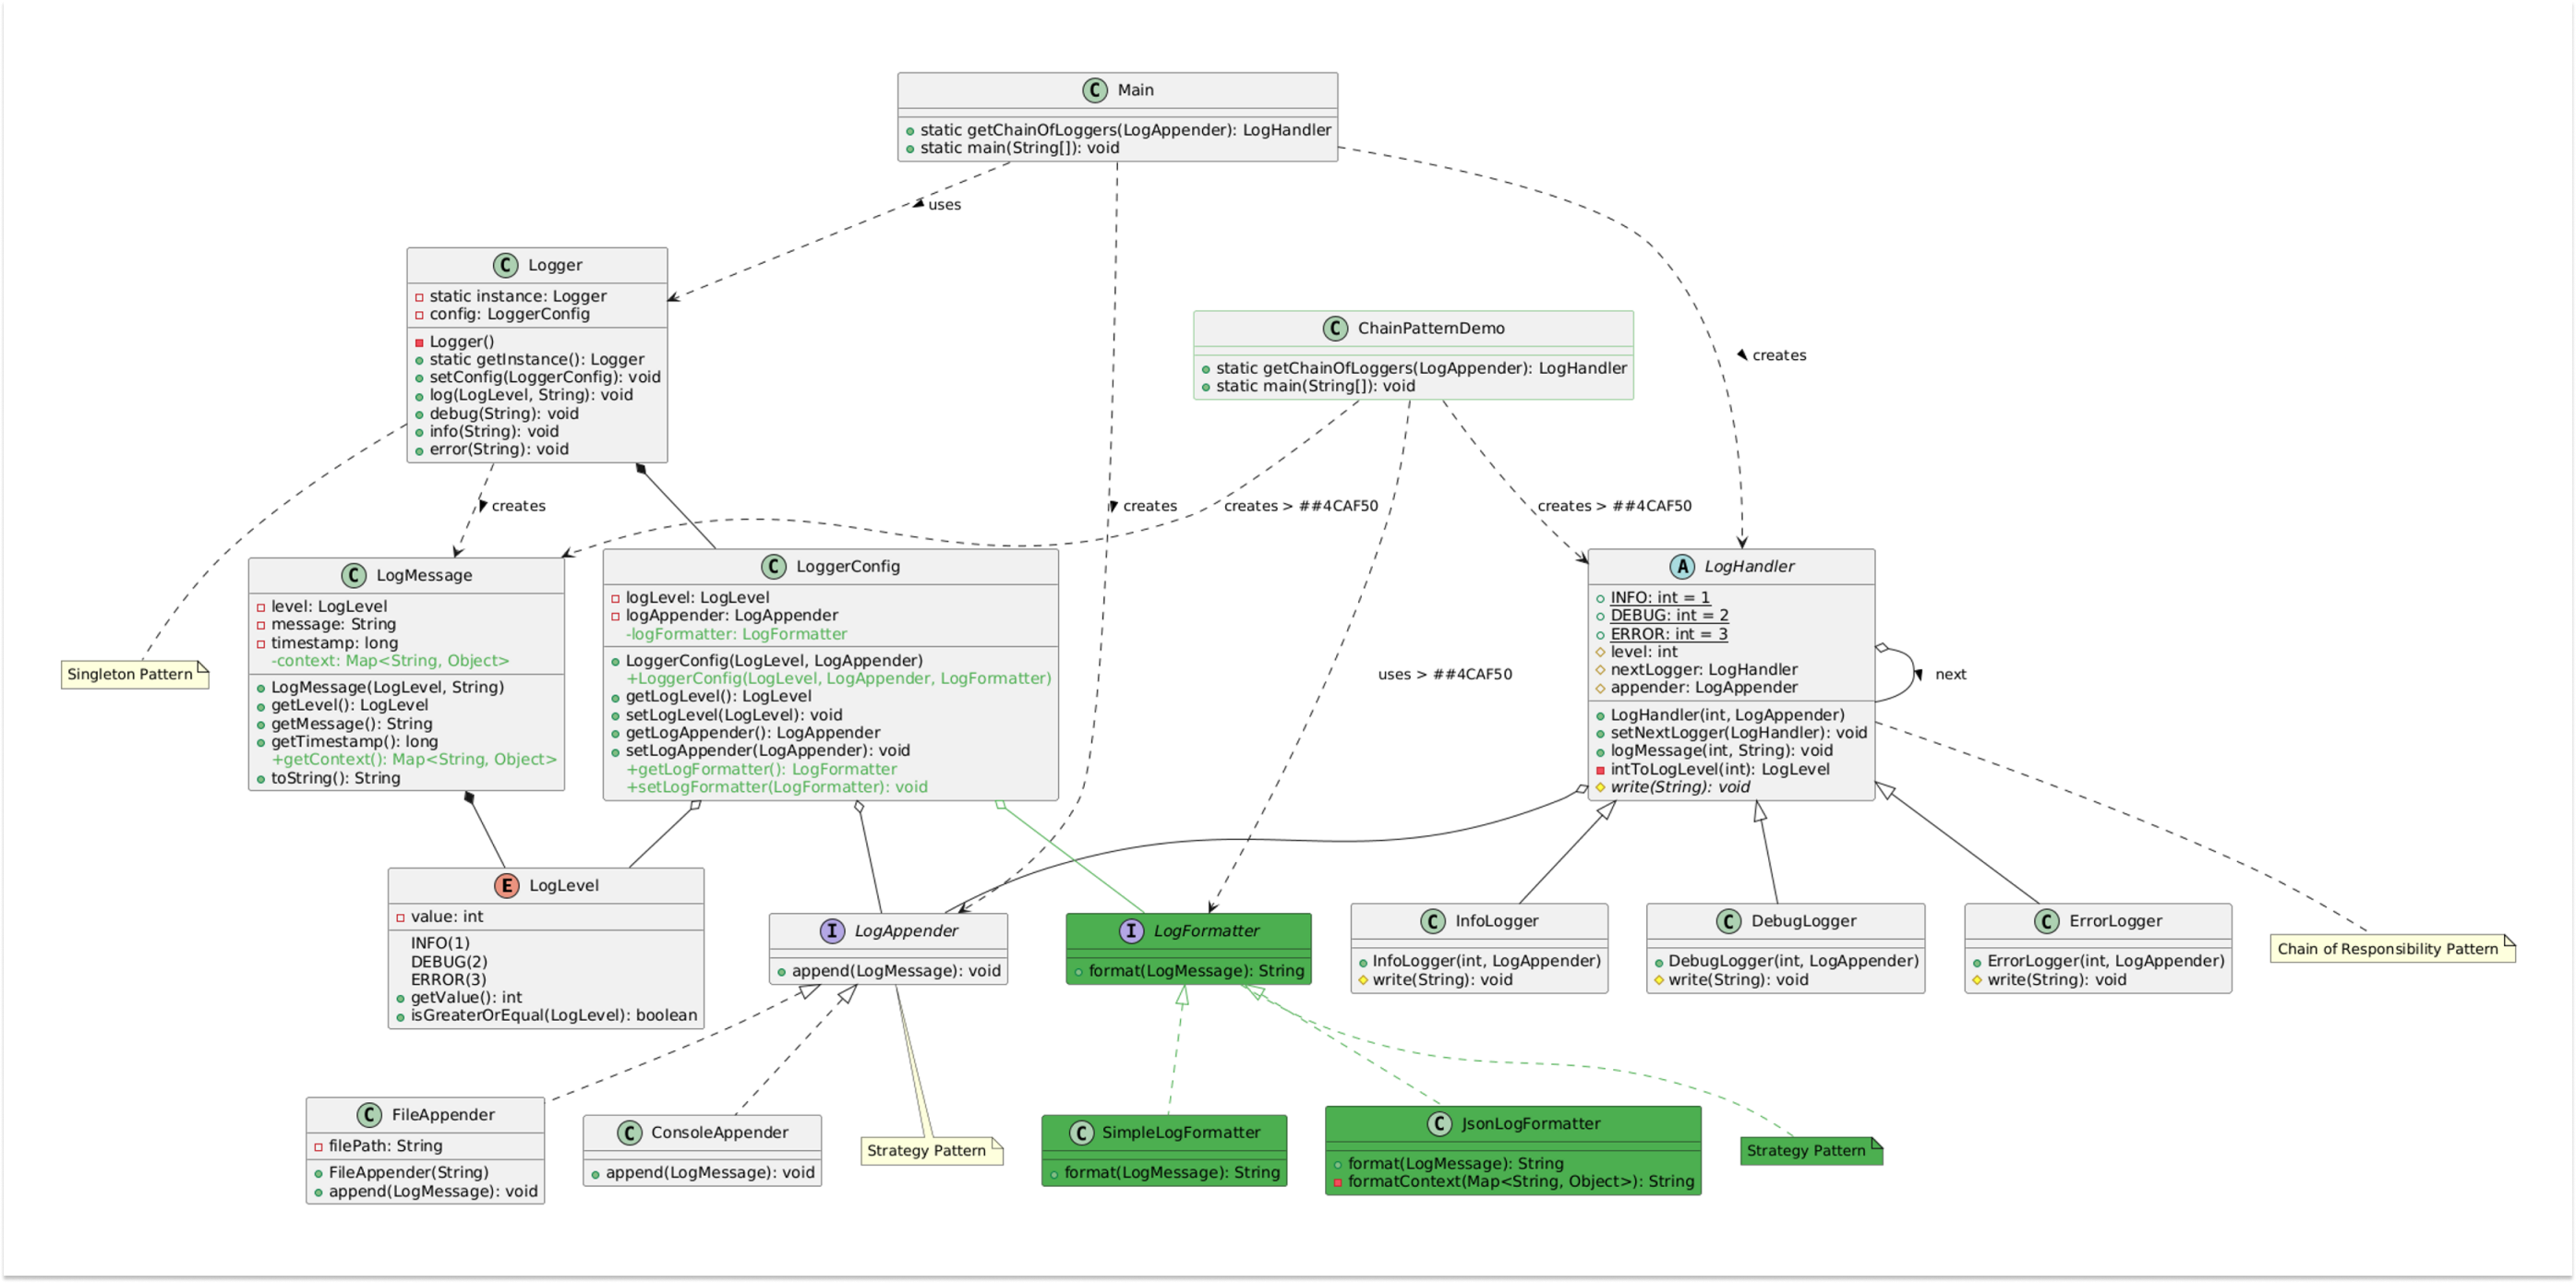